<a href="https://colab.research.google.com/github/vsoier/Curso_de_Estat-stica_Parte_1/blob/main/An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
classes_reais  = [dados.Renda.min(),(2*788), (5*788), (15*788), (25*788), dados.Renda.max()]
classes_reais

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [5]:
labels = ['E','D','C','B','A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [6]:
frequencia_renda = pd.value_counts(pd.cut(x = dados.Renda,
                                    bins = classes_reais,
                                    labels = labels,
                                    include_lowest =True))
frequencia_renda

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
percentual = pd.value_counts(pd.cut(x = dados.Renda,
       bins = classes_reais,
       labels = labels,
       include_lowest = True), normalize = True) * 100

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
dist_freq_quantitativas = pd.DataFrame({'Frequencia' : frequencia_renda, 'Porcentagem (%)': percentual})
dist_freq_quantitativas.rename_axis('Classe', axis = 'columns', inplace= True)
dist_freq_quantitativas.sort_index(ascending= False, inplace= True)
dist_freq_quantitativas

Classe,Frequencia,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

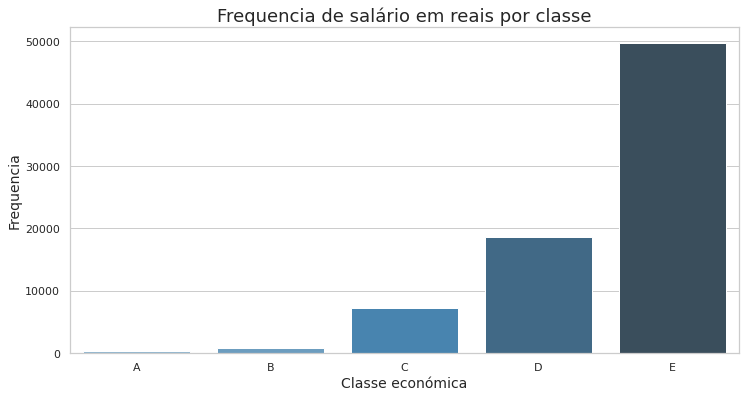

In [9]:
sns.set_theme(style="whitegrid")
ax  = sns.barplot(x= sorted(labels), y = 'Frequencia', data = dist_freq_quantitativas, palette="Blues_d")
ax.figure.set_size_inches(12,6)
ax.set_title('Frequencia de salário em reais por classe', fontsize = 18)
ax.set_xlabel('Classe económica', fontsize = 14)
ax.set_ylabel('Frequencia', fontsize = 14)
ax

> ### Conclusões

A maior parte dos chefes de familia do nosso estudo pertencem a classes D e E, recebendo de 2 até 5 salários mínimos

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [10]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


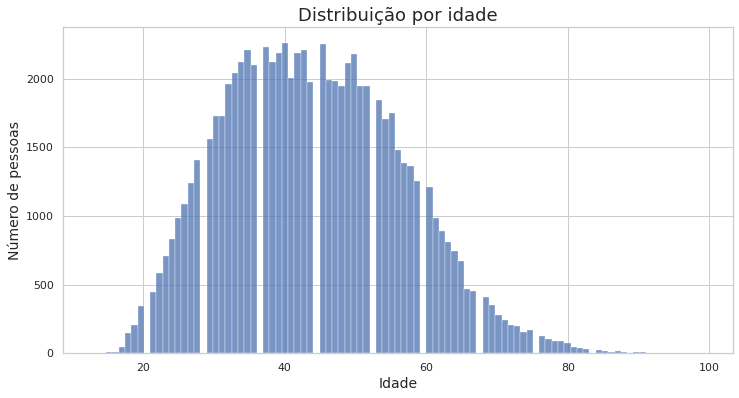

In [11]:
ax = sns.histplot(dados.Idade, kde=False)
ax.figure.set_size_inches(12,6)
ax.set_ylabel('Número de pessoas', fontsize=14)
ax.set_xlabel('Idade', fontsize=14)
ax.set_title('Distribuição por idade', fontsize=18)
ax

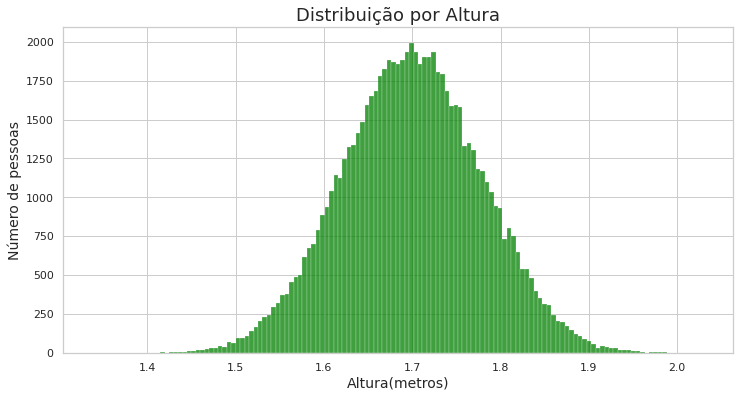

In [12]:
ax = sns.histplot(dados.Altura, kde=False, color= 'green')
ax.figure.set_size_inches(12,6)
ax.set_ylabel('Número de pessoas', fontsize=14)
ax.set_xlabel('Altura(metros)', fontsize=14)
ax.set_title('Distribuição por Altura', fontsize=18)
ax

> ### Conclusões

Analisando por idade podemos ver que nossa distribuição é assímetrica a direita, o que significa que nossa Média é um valor maior que nossa mediana e moda.

Já quando analisamos a Altura, notamnos que temos uma distribuição normal dos nossos dados, tendo as 3 medidas de tendência centrais praticamente no mesmo ponto.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


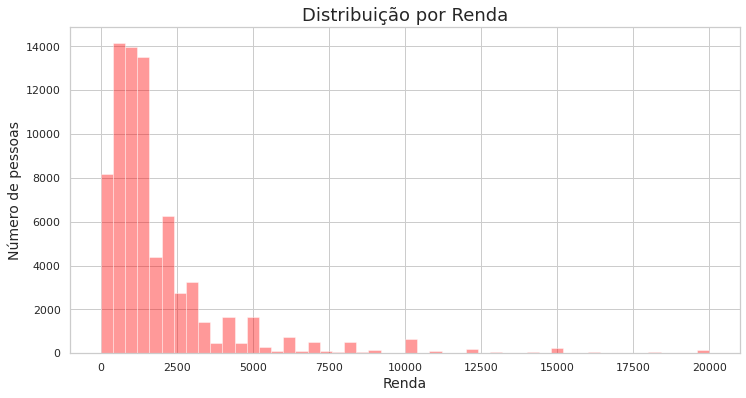

In [13]:
ax = sns.distplot(dados.query('Renda <= 20000').Renda, kde=False, color= 'red')
ax.figure.set_size_inches(12,6)
ax.set_ylabel('Número de pessoas', fontsize=14)
ax.set_xlabel('Renda', fontsize=14)
ax.set_title('Distribuição por Renda', fontsize=18)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzamento das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [14]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [15]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(columns = cor, inplace = True)
frequencia.rename(index = sexo, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [16]:
porcentagem = (pd.crosstab(dados.Sexo,
                         dados.Cor, normalize = True)* 100 )
porcentagem.rename(columns = cor, inplace = True)
porcentagem.rename(index = sexo, inplace = True)
porcentagem

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

A partir das tabelas de distribuição de frequência podemos observar que a maioria das pessoas chefes de família são do sexo masculino. Além disso podemos observar que a raça que mais comum nos nossos dados é a raça parda tendo a maior incidência em ambos os sexos.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [17]:
media_renda = dados.Renda.mean()
media_renda

2000.3831988547631

### Obtenha a mediana

In [18]:
mediana_renda = dados.Renda.median()
mediana_renda

1200.0

### Obtenha a moda

In [19]:
moda_renda = dados.Renda.mode()[0]
moda_renda

788

### Obtenha o desvio médio absoluto

In [20]:
dva_renda = dados.Renda.mad()
dva_renda

1526.4951371644931

### Obtenha a variância

In [21]:
variancia_renda = dados.Renda.var()
variancia_renda

11044906.00622118

### Obtenha o desvio-padrão

In [22]:
std_renda = dados.Renda.std()
std_renda

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [23]:
renda_por_cor_sexo = pd.crosstab(dados.Cor,
                                 dados.Sexo,
                                 values = dados.Renda,
                                 aggfunc= {'mean','median', 'max'})

renda_por_cor_sexo.rename(index = cor, inplace = True)
renda_por_cor_sexo.rename(columns = sexo, inplace = True)
renda_por_cor_sexo

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

A renda máxima masculina é maior que a renda máxima feminina em todos os casos excetuando-se na raça indígena. A média dos salários se comporta exatamente da mesma forma homens recebem uma média salarial maior que as mulheres,que recebem uma média salarial maior apenas na raça indígena Já a mediana dos salários mostra que até na raça indígena os homens têm o salário maior,desta forma podemos identificar que possivelmente o salário máximo feminino indígena é um valor incomum que faz com que a média fique maior!

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [24]:
dispersao_renda_por_cor_sexo = pd.crosstab(dados.Cor,
                                 dados.Sexo,
                                 values = dados.Renda,
                                 aggfunc= {'mad','var', 'std'})

dispersao_renda_por_cor_sexo.rename(index = cor, inplace = True)
dispersao_renda_por_cor_sexo.rename(columns = sexo, inplace = True)
dispersao_renda_por_cor_sexo

mad               ...           var              
Sexo        Masculino     Feminino  ...     Masculino      Feminino
Cor                                 ...                            
Indígena   798.910889  3007.892952  ...  1.449841e+06  1.429818e+08
Branca    2261.012346  1670.967106  ...  2.257002e+07  1.056909e+07
Preta      975.602482   705.453357  ...  3.749294e+06  1.821960e+06
Amarela   3709.597211  2549.146322  ...  3.295707e+07  1.392166e+07
Parda     1125.827704   811.580946  ...  5.345747e+06  2.547960e+06

[5 rows x 6 columns]

> ### Conclusões

As medidas dos homens, em sua maioria, estão dispostas de maneira mais dispersa, ou seja, apresentam valores mais distantes das medidas de tendencias centrais. Com esses dados podemos chegar a conclusão de que as mulheres recebem em média menos, porém os seus salarios são mais próximos um do outro dentro de uma mesma etnia.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

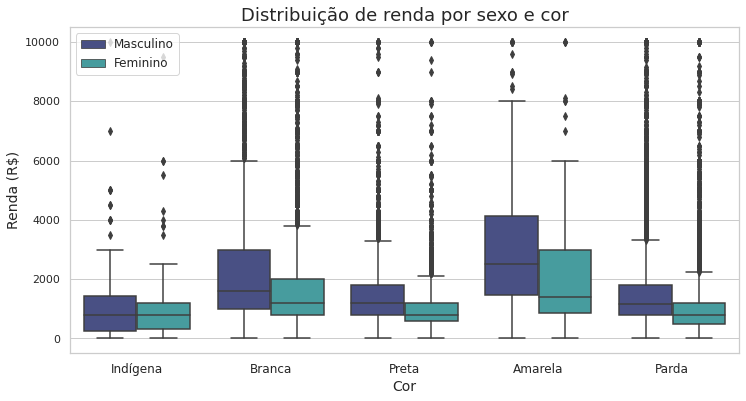

In [61]:
ax = sns.boxplot(x='Cor', y='Renda', data= dados.query('Renda <=10000'), hue='Sexo', palette="mako")
ax.figure.set_size_inches(12,6)
ax.set_ylabel('Renda (R$)', fontsize=14)
ax.set_xlabel('Cor', fontsize=14)
ax.set_title('Distribuição de renda por sexo e cor', fontsize=18)
ax.set_xticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

O gráfico que plotamos mostra que as expectativas que tínhamos através das tabelas estavam corretas, em geral, os homens ganham mais que as mulheres, porém os dados são mais dispersos,tendo diversos valores distantes do centro dos dados.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [38]:
from scipy import stats
percentual_abaixo_salario_minimo = stats.percentileofscore(dados.Renda, 788, kind='weak')
print("{0:.2f}%".format(percentual_abaixo_salario_minimo))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [43]:
max_99 = dados.Renda.quantile(q =0.99)
print("R$ {0:.2f}".format(max_99))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [45]:
renda_por_estudo_sexo = pd.crosstab(dados['Anos de Estudo'],
                                 dados.Sexo,
                                 values = dados.Renda,
                                 aggfunc= {'mean','median', 'max','std'})

renda_por_estudo_sexo.rename(index = anos_de_estudo, inplace = True)
renda_por_estudo_sexo.rename(columns = sexo, inplace = True)
renda_por_estudo_sexo

max            ...          std             
Sexo                           Masculino  Feminino  ...    Masculino     Feminino
Anos de Estudo                                      ...                          
Sem instrução e menos de 1 ano   30000.0   10000.0  ...  1023.904884   639.311534
1 ano                            30000.0    2000.0  ...  1331.950552   425.291842
2 anos                           40000.0    4000.0  ...  1435.173827   498.234168
3 anos                           80000.0    3500.0  ...  2143.800133   424.124446
4 anos                           50000.0   10000.0  ...  1419.821787   629.553397
5 anos                           35000.0    8000.0  ...  1484.650587   635.782641
6 anos                           25000.0    6000.0  ...  1476.628602   574.547028
7 anos                           40000.0    9000.0  ...  1419.708673   602.038029
8 anos                           30000.0   18000.0  ...  1515.583715   896.781213
9 anos                           60000.0   20000.0  ...  2137.664774   973.221652
10 anos                          45000.0    6000.0  ...  2078.609734   620.611907
11 anos                         200000.0  100000.0  ...  2676.538942  1819.040417
12 anos                          30000.0  120000.0  ...  2268.081538  4851.833513
13 anos                          25000.0   20000.0  ...  2797.116800  2053.789771
14 anos                          50000.0   20000.0  ...  3987.214974  2064.083336
15 anos ou mais                 200000.0  100000.0  ...  7447.613594  4212.770709
Não determinados                  7000.0    3000.0  ...   979.648745   459.985964

[17 rows x 8 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

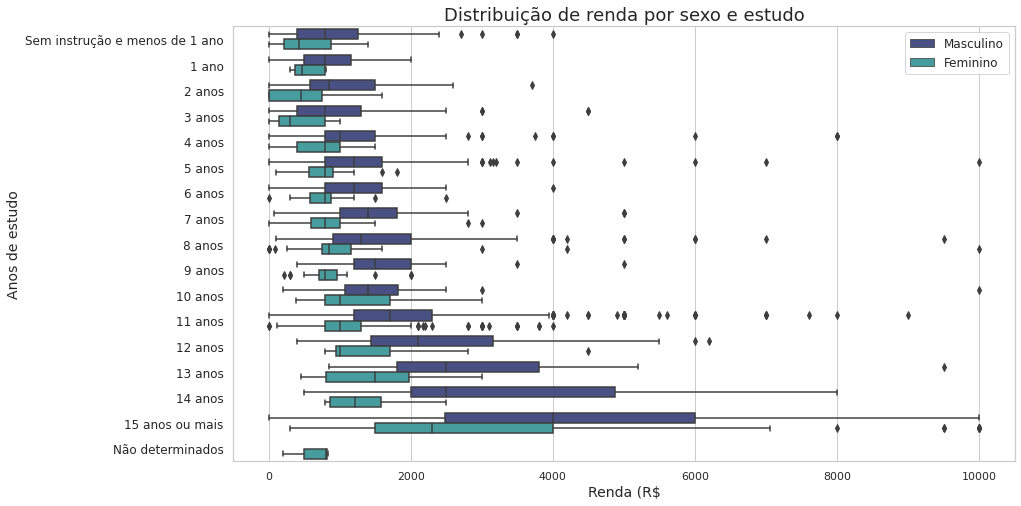

In [60]:
ax = sns.boxplot(y='Anos de Estudo', x='Renda', data= dados.query('Renda <=10000and Idade == 40' ), hue='Sexo', palette="mako", orient= 'h')
ax.figure.set_size_inches(14,8)
ax.set_xlabel('Renda (R$', fontsize=14)
ax.set_ylabel('Anos de estudo', fontsize=14)
ax.set_title('Distribuição de renda por sexo e estudo', fontsize=18)
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

Conseguimos notar que homens ganham mais que mulheres, mesmo tendo aa mesma escolaridade, existe uma desigualdade clara entre a remunaração por gênero.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [63]:
renda_por_estado = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_por_estado  =renda_por_estado.rename(index=uf)
renda_por_estado

Renda                            
                            mean median     max          std
UF                                                          
Rondônia             1789.761223   1200   50000  2406.161161
Acre                 1506.091782    900   30000  2276.233415
Amazonas             1445.130100    900   22000  1757.935591
Roraima              1783.588889   1000   20000  2079.659238
Pará                 1399.076871    850   50000  2053.779555
Amapá                1861.353516   1200   15580  2020.688632
Tocantins            1771.094946   1000   60000  2934.590741
Maranhão             1019.432009    700   30000  1887.816905
Piauí                1074.550784    750   40000  2373.355726
Ceará                1255.403692    789   25000  1821.963536
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Paraíba              1293.370487    788   30000  1950.272431
Pernambuco           1527.079319    900   50000  2389.622497
Alagoas              1144.552602    788   11000  1237.856197
Sergipe              1109.111111    788   16000  1478.997878
Bahia                1429.645094    800  200000  3507.917248
Minas Gerais         2056.432084   1200  100000  3584.721547
Espírito Santo       2026.383852   1274  100000  3513.846868
Rio de Janeiro       2496.403168   1400  200000  5214.583518
São Paulo            2638.104986   1600   80000  3503.777366
Paraná               2493.870753   1500  200000  4302.937995
Santa Catarina       2470.854945   1800   80000  3137.651112
Rio Grande do Sul    2315.158336   1500   35000  2913.335783
Mato Grosso do Sul   2262.604167   1500   42000  3031.419122
Mato Grosso          2130.652778   1500   35000  2542.630178
Goiás                1994.580794   1500   30000  2221.933065
Distrito Federal     4241.954722   2000  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

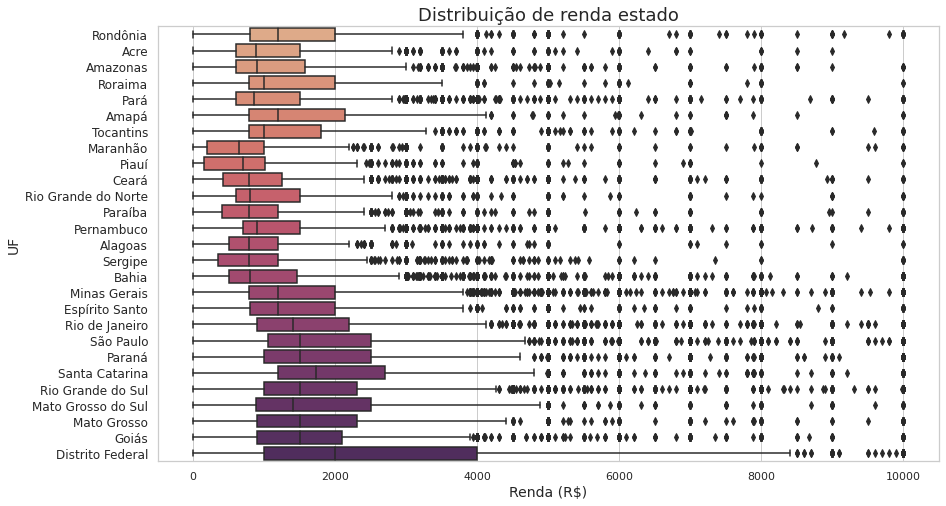

In [65]:
ax = sns.boxplot(y='UF', x='Renda', data= dados.query('Renda <=10000' ), palette="flare", orient= 'h')
ax.figure.set_size_inches(14,8)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('UF', fontsize=14)
ax.set_title('Distribuição de renda estado', fontsize=18)
ax.set_yticklabels([key for key in uf.values()], fontsize=12)

ax

> ### Conclusões

Verificamos que as melhores remunerações estão no Distrito Federal, o que pode ser explicado pela presença de diversos políticos que apresentam sálarios muito altos. Podemos notar também que estados do Nordeste(Piauí, Maranhão, Ceará, etc) apresentam as menores remunerações do nosso pais.